# ISRO SAC Forecast Viz

**Contributors:** Deepak Cherian(NCAR), Aneesh Subramanian (CU, Boulder), Neeraj S. (ISRO)

```{contents}
```

In [1]:
import datetime


import astral
import cf_xarray  # noqa
import xarray as xr


import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 13

time = datetime.datetime.now()
nice_time = time.strftime("%Y-%m-%dT%T")
print(f"Last updated: {time}")

send_email = True
%load_ext watermark
%watermark -iv

Last updated: 2023-06-07 19:34:43.624068
cf_xarray : 0.8.1
json      : 2.0.9
sys       : 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:57:19) [GCC 11.3.0]
matplotlib: 3.7.1
xarray    : 2022.6.1.dev225+g19838dce1.d20230607



In [2]:
import hvplot.xarray  # noqa
import holoviews as hv

hv.notebook_extension("bokeh")

In [3]:
hv.opts.defaults(
    hv.opts.Curve(muted_alpha=0, fontscale=1.3, line_width=2, color=hv.Cycle("Dark2")),
    hv.opts.Area(color=hv.Cycle("Dark2"), muted_fill_alpha=0, muted_line_alpha=0),
    hv.opts.Layout(fontscale=1.3, sizing_mode="stretch_width", toolbar="left"),
    hv.opts.Overlay(
        active_tools=["box_zoom"],
        default_tools=["save", "pan", "box_zoom", "reset"],
        toolbar="left",
    ),
)

## Read forecast data

In [4]:
ds = astral.read_forecast_data()
ds

<xarray.Dataset>
Dimensions:   (xt_i: 560, yt_j: 400, xu_i: 560, yu_j: 400, zt_k: 50, lead: 21,
               init: 5)
Coordinates:
  * xt_i      (xt_i) float32 27.5 28.5 29.48 30.46 ... 138.5 139.5 140.5 141.5
  * yt_j      (yt_j) float32 -34.5 -33.5 -32.52 -31.54 ... 25.75 25.85 25.95
  * xu_i      (xu_i) float32 28.0 28.99 29.97 30.93 ... 139.0 140.0 141.0 142.0
  * yu_j      (yu_j) float32 -34.0 -33.01 -32.03 -31.07 ... 25.7 25.8 25.9 26.0
  * zt_k      (zt_k) float32 1.0 3.017 5.084 ... 4.175e+03 4.731e+03 5.32e+03
  * lead      (lead) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:00:00
  * init      (init) datetime64[ns] 2023-06-02 2023-06-03 ... 2023-06-07
    time      (init, lead) datetime64[ns] 2023-06-02 ... 2023-06-12
Data variables:
    temp      (init, lead, zt_k, yt_j, xt_i) float32 dask.array<chunksize=(1, 21, 50, 400, 560), meta=np.ndarray>
    salinity  (init, lead, zt_k, yt_j, xt_i) float32 dask.array<chunksize=(1, 21, 50, 400, 560), meta=np.ndarray>
    u         (init, lead, zt_k, yu_j, xu_i) float32 dask.array<chunksize=(1, 21, 50, 400, 560), meta=np.ndarray>
    v         (init, lead, zt_k, yu_j, xu_i) float32 dask.array<chunksize=(1, 21, 50, 400, 560), meta=np.ndarray>
    hmxl      (init, lead, yt_j, xt_i) float32 dask.array<chunksize=(1, 21, 400, 560), meta=np.ndarray>
Attributes:
    CDI:             Climate Data Interface version 1.7.0 (http://mpimet.mpg....
    Conventions:     CF-1.4
    history:         Fri Jun 02 16:25:33 2023: cdo cat -settaxis,2023-06-02,0...
    filename:        time_mean.000047.06.02.dta.nc
    MPP_IO_VERSION:  $Id: mpp_io.F90,v 5.3 1999/12/03 16:59:31 vb Exp $
    title:           Time mean  {MOM 3.0}
    CDO:             Climate Data Operators version 1.7.0 (http://mpimet.mpg....

## Subset to moorings

In [5]:
moors = xr.concat(
    [
        ds.cf.sel(**loc, method="nearest")
        .assign_coords(moor=name)
        .cf.sel(Z=slice(500))  # .load()
        for name, loc in astral.LOCS.items()
    ],
    dim="moor",
)
moors.attrs["last_extracted"] = nice_time
moors

<xarray.Dataset>
Dimensions:   (moor: 3, zt_k: 33, lead: 21, init: 5)
Coordinates:
    xt_i      (moor) float32 67.45 68.95 68.65
    yt_j      (moor) float32 18.55 14.95 12.05
    xu_i      (moor) float32 67.4 69.0 68.6
    yu_j      (moor) float32 18.5 14.9 12.1
  * zt_k      (zt_k) float32 1.0 3.017 5.084 7.23 ... 316.1 363.7 423.7 496.1
  * lead      (lead) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:00:00
  * init      (init) datetime64[ns] 2023-06-02 2023-06-03 ... 2023-06-07
    time      (init, lead) datetime64[ns] 2023-06-02 ... 2023-06-12
  * moor      (moor) <U4 'AD06' 'AD07' 'AD08'
Data variables:
    temp      (moor, init, lead, zt_k) float32 dask.array<chunksize=(1, 1, 21, 33), meta=np.ndarray>
    salinity  (moor, init, lead, zt_k) float32 dask.array<chunksize=(1, 1, 21, 33), meta=np.ndarray>
    u         (moor, init, lead, zt_k) float32 dask.array<chunksize=(1, 1, 21, 33), meta=np.ndarray>
    v         (moor, init, lead, zt_k) float32 dask.array<chunksize=(1, 1, 21, 33), meta=np.ndarray>
    hmxl      (moor, init, lead) float32 dask.array<chunksize=(1, 1, 21), meta=np.ndarray>
Attributes:
    CDI:             Climate Data Interface version 1.7.0 (http://mpimet.mpg....
    Conventions:     CF-1.4
    history:         Fri Jun 02 16:25:33 2023: cdo cat -settaxis,2023-06-02,0...
    filename:        time_mean.000047.06.02.dta.nc
    MPP_IO_VERSION:  $Id: mpp_io.F90,v 5.3 1999/12/03 16:59:31 vb Exp $
    title:           Time mean  {MOM 3.0}
    CDO:             Climate Data Operators version 1.7.0 (http://mpimet.mpg....
    last_extracted:  2023-06-07T19:34:43

In [6]:
init_time = moors.init[-1].dt.strftime("%Y-%m-%dT%H.%M").data.item()

moors.load().to_netcdf(
    f"isro-forecast-ad-moorings-{init_time.replace(':', '.')}.nc", mode="w"
)
moors.load().to_netcdf("isro-forecast-ad-moorings-latest.nc", mode="w")

In [7]:
import subprocess

if send_email:
    subprocess.run(
        [
            "mail",
            "-s",
            f"'ISRO forecast initialized {init_time}'",
            "-a",
            "isro-forecast-ad-moorings-latest.nc",
            "dcherian@ucar.edu",
            "skerhalkar@umassd.edu",
        ]
    )

Null message body; hope that's ok


## Animations: T, S, u, v at 1m, 25m, 50m

In [8]:
subset = ds.cf.sel(
    X=slice(63, 78),
    Y=slice(4, 24),
    Z=slice(200),
).load()
decimated = subset.cf.isel(
    init=-1, Y=slice(None, None, 4), X=slice(None, None, 4)
).load()

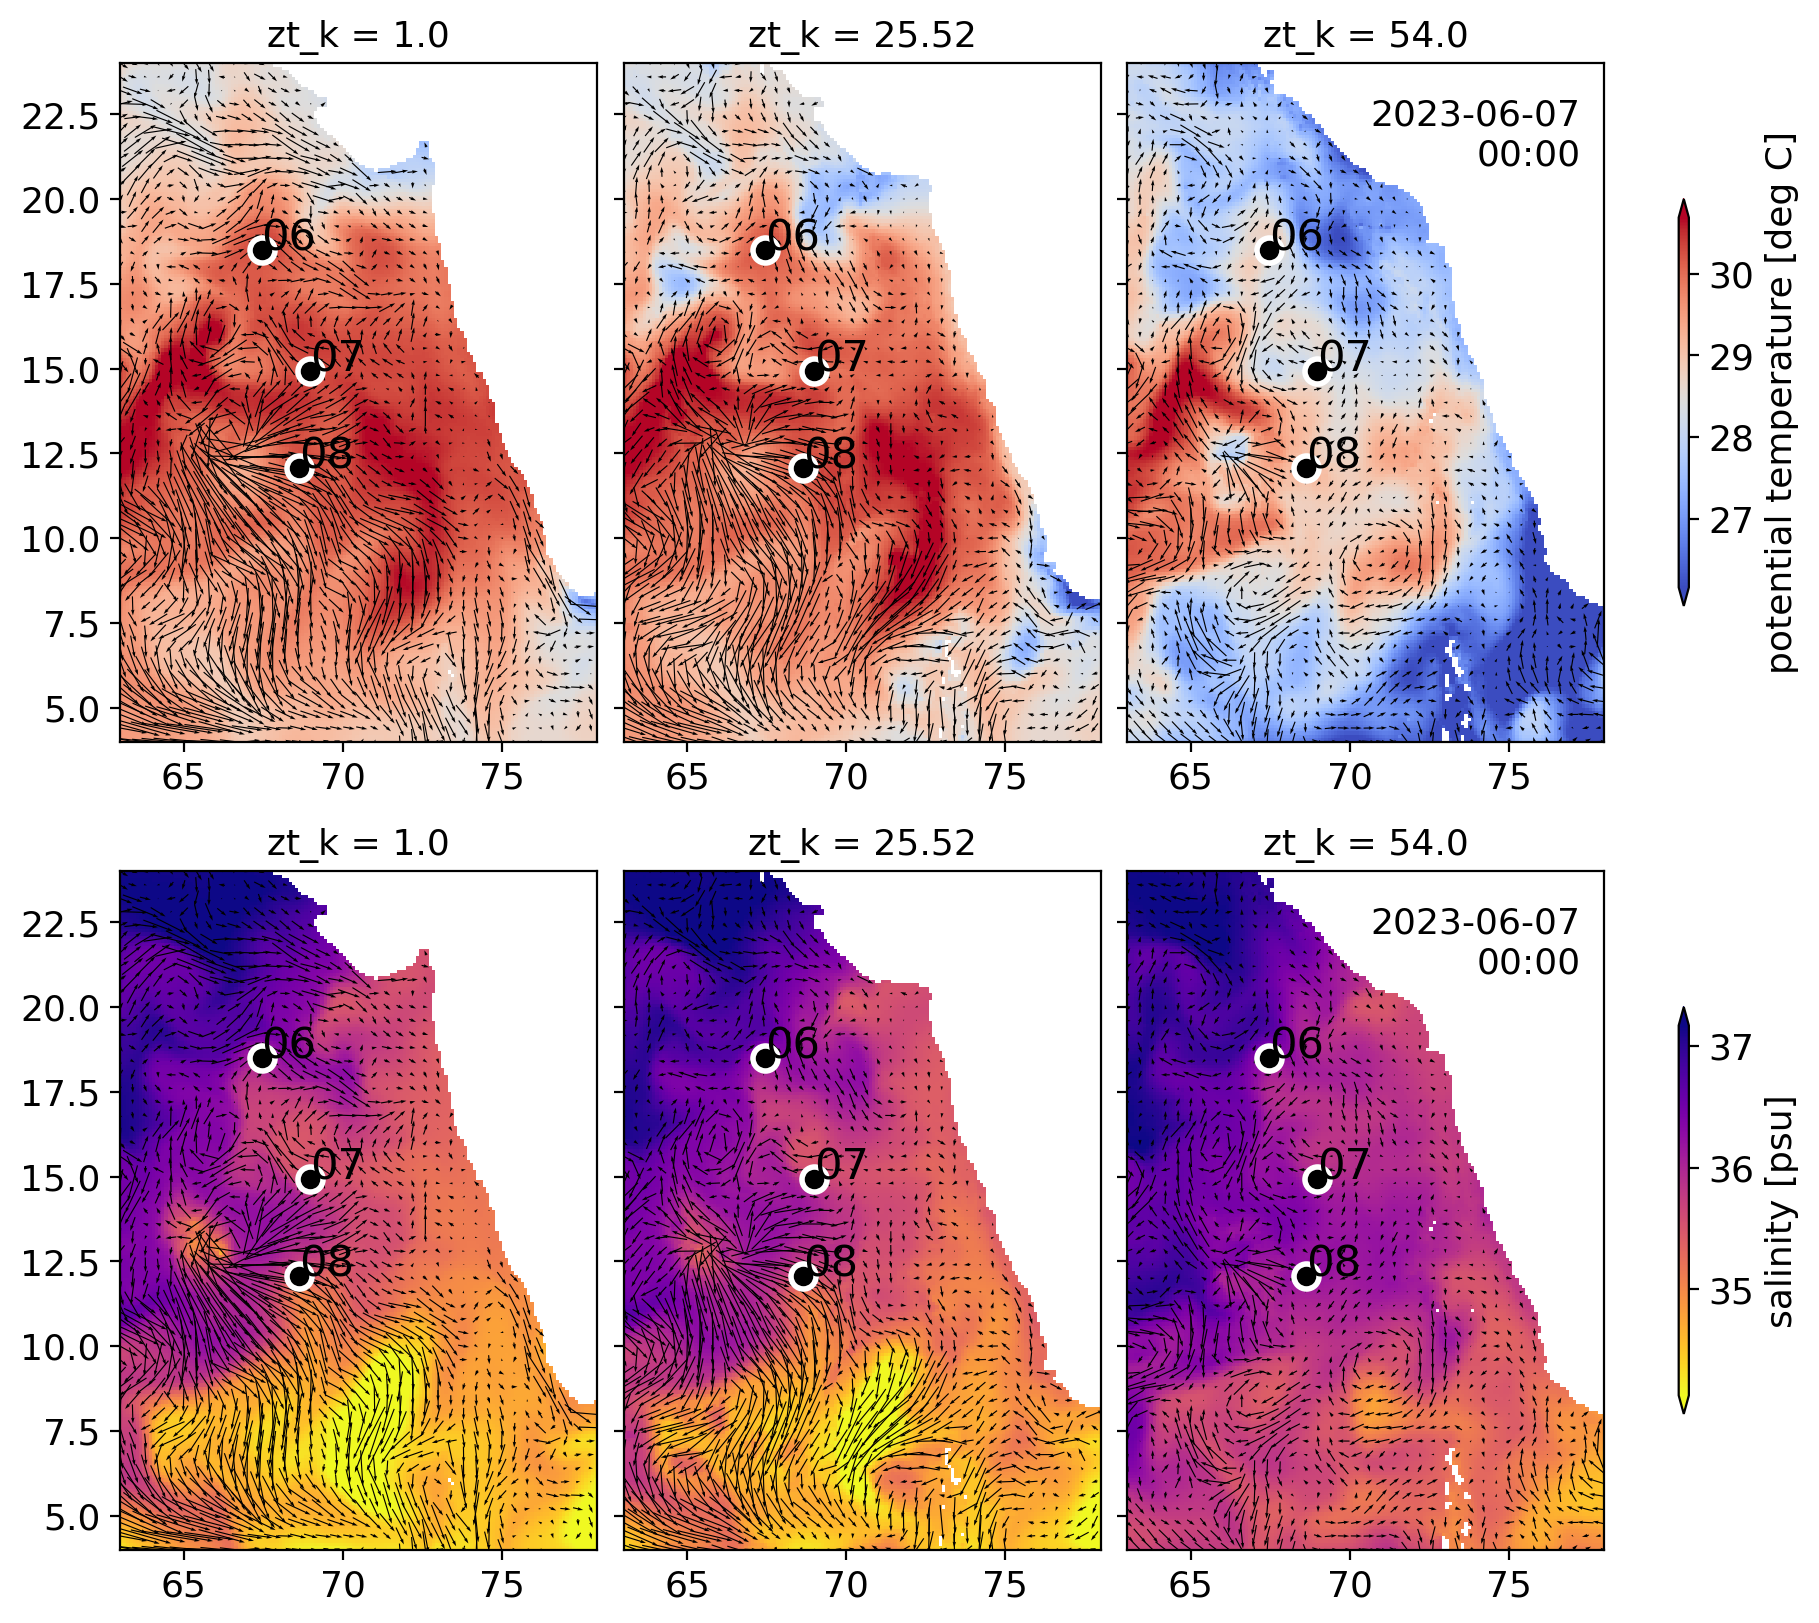

In [9]:
%autoreload

fig = plt.figure(layout="constrained", figsize=(9, 8))
# subfigs_lr = fig.subfigures(1, 2, width_ratios=(1,3))
subfigs_TS = fig.subfigures(2, 1)


fg = {
    "temp": astral.plot_frame(
        subset.temp.isel(init=-1), decimated, cmap="coolwarm", fig=subfigs_TS[0]
    ),
    "salinity": astral.plot_frame(
        subset.salinity.isel(init=-1),
        decimated,
        cmap="plasma_r",
        fig=subfigs_TS[1],
    ),
    # "hxml": astral.plot_frame(
    #    subset.hmxl.isel(init=-1), decimated, cmap="plasma_r", fig=subfigs_lr[0],
    # ),
}

# fig

In [10]:
import matplotlib.animation as animation


def update_both(i):
    for var in ["temp", "salinity"]:
        astral.update_frame_lead(
            i=i,
            varname=var,
            fg=fg[var],
            subset=subset,
            decimated=decimated,
        )


ani = animation.FuncAnimation(
    fig,
    update_both,
    repeat=True,
    frames=subset.sizes["lead"] - 1,
    interval=20,
)

In [11]:
writer = animation.PillowWriter(fps=4, bitrate=300)
ani.save("isro-TS.gif", writer=writer, dpi=84)
# ani.save(f"isro-TS.gif", writer="imagemagick")

```{image} ./isro-TS.gif
:align: center
```


In [12]:
#writer = animation.HTMLWriter(fps=4, bitrate=200, embed_frames=True)
#ani.save("isro-TS.html", writer=writer)

# del ani

## mixed layer depth. SSU, SSV

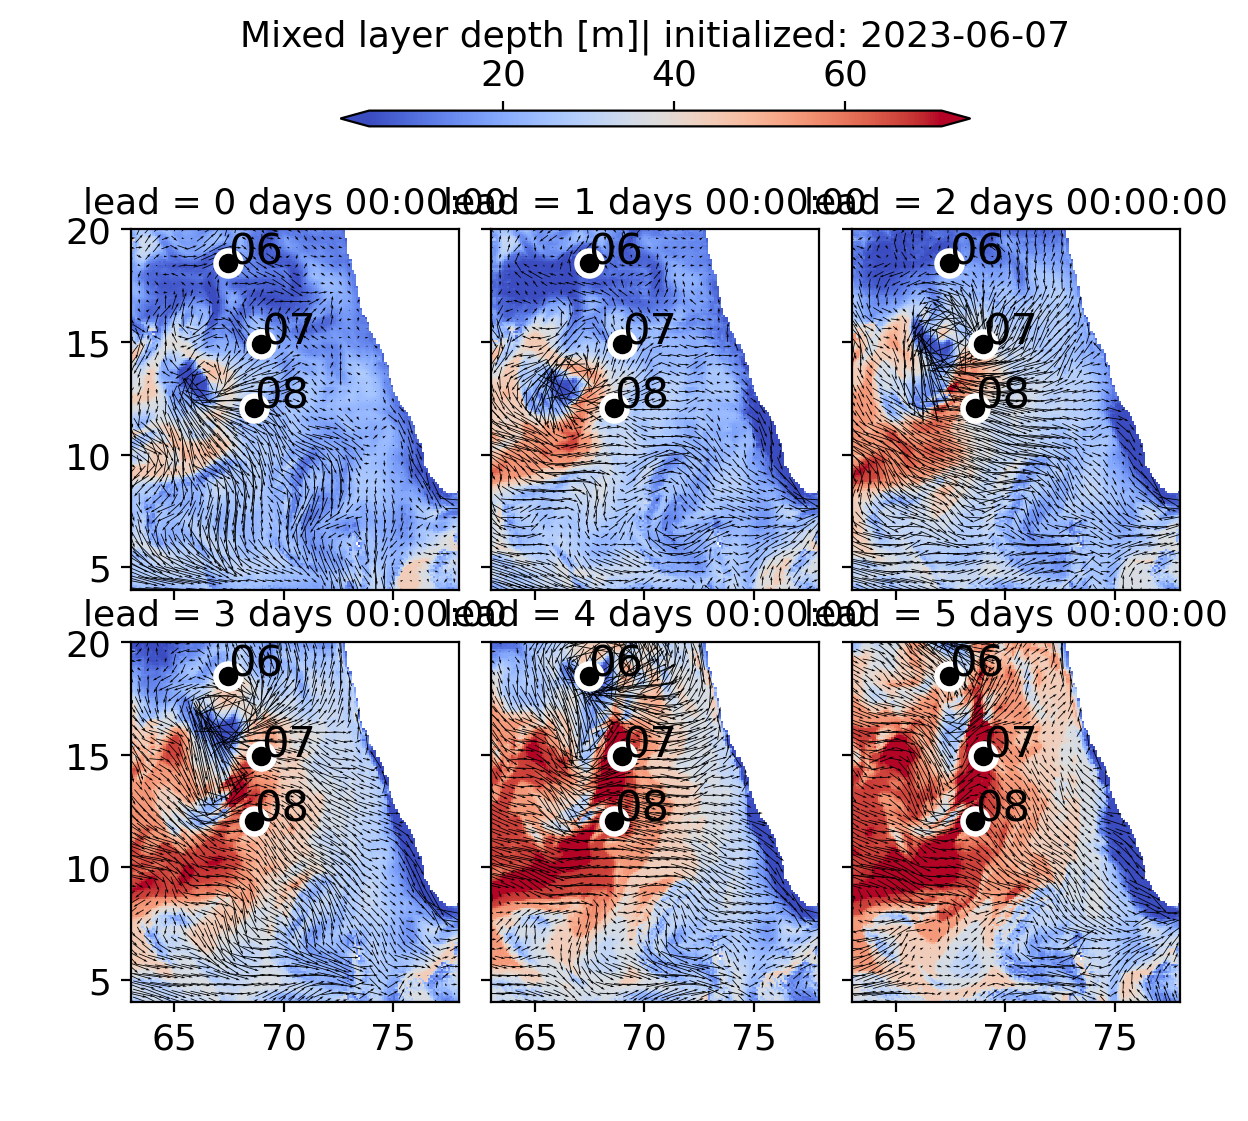

In [13]:
%autoreload

fg = astral.plot_facetgrid(
    subset.hmxl.cf.sel(Y=slice(20)).isel(lead=slice(None, None, 4)),
    decimated,
    cbar_location="top",
    pad=0.1,
    col_wrap=3,
)
fg.set_xlabels(" ")
fg.set_ylabels(" ")
fg.fig.set_size_inches((6, 6))

## SST, SSS, HMXL timeseries

In [14]:
surf = moors.cf.sel(Z=0, method="nearest").load()

In [15]:
astral.plot_surface_vars(moors.sel(moor="AD06"))

:Layout
   .NdOverlay.I   :NdOverlay   [init]
      :Curve   [time]   (temp)
   .NdOverlay.II  :NdOverlay   [init]
      :Curve   [time]   (salinity)
   .NdOverlay.III :NdOverlay   [init]
      :Curve   [time]   (hmxl)

In [16]:
astral.plot_surface_vars(moors.sel(moor="AD07"))

:Layout
   .NdOverlay.I   :NdOverlay   [init]
      :Curve   [time]   (temp)
   .NdOverlay.II  :NdOverlay   [init]
      :Curve   [time]   (salinity)
   .NdOverlay.III :NdOverlay   [init]
      :Curve   [time]   (hmxl)

In [17]:
astral.plot_surface_vars(moors.sel(moor="AD08"))

:Layout
   .NdOverlay.I   :NdOverlay   [init]
      :Curve   [time]   (temp)
   .NdOverlay.II  :NdOverlay   [init]
      :Curve   [time]   (salinity)
   .NdOverlay.III :NdOverlay   [init]
      :Curve   [time]   (hmxl)

## T, S time series

In [18]:
astral.plot_ts_profiles_line(moors.sel(moor="AD06"))

:Layout
   .NdOverlay.I  :NdOverlay   [zt_k]
      :Curve   [time]   (temp)
   .NdOverlay.II :NdOverlay   [zt_k]
      :Curve   [time]   (salinity)

In [19]:
astral.plot_ts_profiles_line(moors.sel(moor="AD07"))

:Layout
   .NdOverlay.I  :NdOverlay   [zt_k]
      :Curve   [time]   (temp)
   .NdOverlay.II :NdOverlay   [zt_k]
      :Curve   [time]   (salinity)

In [20]:
astral.plot_ts_profiles_line(moors.sel(moor="AD08"))

:Layout
   .NdOverlay.I  :NdOverlay   [zt_k]
      :Curve   [time]   (temp)
   .NdOverlay.II :NdOverlay   [zt_k]
      :Curve   [time]   (salinity)

## T, S forecast profiles

### T

In [21]:
astral.plot_forecast_offset_lines(moors.temp)

:Layout
   .NdOverlay.I   :NdOverlay   [time]
      :Curve   [temp]   (zt_k)
   .NdOverlay.II  :NdOverlay   [time]
      :Curve   [temp]   (zt_k)
   .NdOverlay.III :NdOverlay   [time]
      :Curve   [temp]   (zt_k)

### S

In [22]:
%autoreload

astral.plot_forecast_offset_lines(moors.salinity)

:Layout
   .NdOverlay.I   :NdOverlay   [time]
      :Curve   [salinity]   (zt_k)
   .NdOverlay.II  :NdOverlay   [time]
      :Curve   [salinity]   (zt_k)
   .NdOverlay.III :NdOverlay   [time]
      :Curve   [salinity]   (zt_k)

## Development

### preprocessing function

In [23]:
ds0 = xr.open_dataset(
    "/glade/scratch/acsubram/EKAMSAT/SAC_OSF_CIRC_10KM_20230603.nc",
    decode_times=False,
    chunks={"zt_k": 1, "Time": -1},
)
astral.preprocess(ds0)

<xarray.Dataset>
Dimensions:   (xt_i: 560, yt_j: 400, xu_i: 560, yu_j: 400, zt_k: 50, lead: 21,
               init: 1)
Coordinates:
  * xt_i      (xt_i) float32 27.5 28.5 29.48 30.46 ... 138.5 139.5 140.5 141.5
  * yt_j      (yt_j) float32 -34.5 -33.5 -32.52 -31.54 ... 25.75 25.85 25.95
  * xu_i      (xu_i) float32 28.0 28.99 29.97 30.93 ... 139.0 140.0 141.0 142.0
  * yu_j      (yu_j) float32 -34.0 -33.01 -32.03 -31.07 ... 25.7 25.8 25.9 26.0
  * zt_k      (zt_k) float32 1.0 3.017 5.084 ... 4.175e+03 4.731e+03 5.32e+03
  * lead      (lead) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:00:00
  * init      (init) datetime64[ns] 2023-06-03
    time      (init, lead) datetime64[ns] 2023-06-03 ... 2023-06-08
Data variables:
    temp      (init, lead, zt_k, yt_j, xt_i) float32 dask.array<chunksize=(1, 21, 1, 400, 560), meta=np.ndarray>
    salinity  (init, lead, zt_k, yt_j, xt_i) float32 dask.array<chunksize=(1, 21, 1, 400, 560), meta=np.ndarray>
    u         (init, lead, zt_k, yu_j, xu_i) float32 dask.array<chunksize=(1, 21, 1, 400, 560), meta=np.ndarray>
    v         (init, lead, zt_k, yu_j, xu_i) float32 dask.array<chunksize=(1, 21, 1, 400, 560), meta=np.ndarray>
    hmxl      (init, lead, yt_j, xt_i) float32 dask.array<chunksize=(1, 21, 400, 560), meta=np.ndarray>
Attributes:
    CDI:             Climate Data Interface version 1.7.0 (http://mpimet.mpg....
    Conventions:     CF-1.4
    history:         Sat Jun 03 16:26:38 2023: cdo cat -settaxis,2023-06-03,0...
    filename:        time_mean.000047.06.03.dta.nc
    MPP_IO_VERSION:  $Id: mpp_io.F90,v 5.3 1999/12/03 16:59:31 vb Exp $
    title:           Time mean  {MOM 3.0}
    CDO:             Climate Data Operators version 1.7.0 (http://mpimet.mpg....

## T, S, U, V maps

### T

### S